# Three Type of Clustering Apartment
---


# Introduction

Di dunia sewa-menyewa apartemen, memahami berbagai jenis properti yang tersedia sangat penting baik bagi penyewa maupun manajer properti. Pengelompokan atau clustering, sebuah metode untuk mengelompokkan apartemen yang serupa, memberikan cara yang jelas untuk mengkategorikan mereka berdasarkan fitur-fitur umum. Dengan memahami metode-metode clustering ini, kita dapat lebih mudah menavigasi pasar sewa-menyewa apartemen dan menemukan yang paling cocok untuk kebutuhan pelanggan kita.

In [2]:
# Melakukan import libraries yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
import pickle

In [14]:
# Melakukan loading dataset
data_sebelum = pd.read_csv('properties_data.csv')
data_sesudah = pd.read_csv('data_cluster.csv', index_col=0)

In [15]:
# Cek column
data_sebelum.head(3)

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True


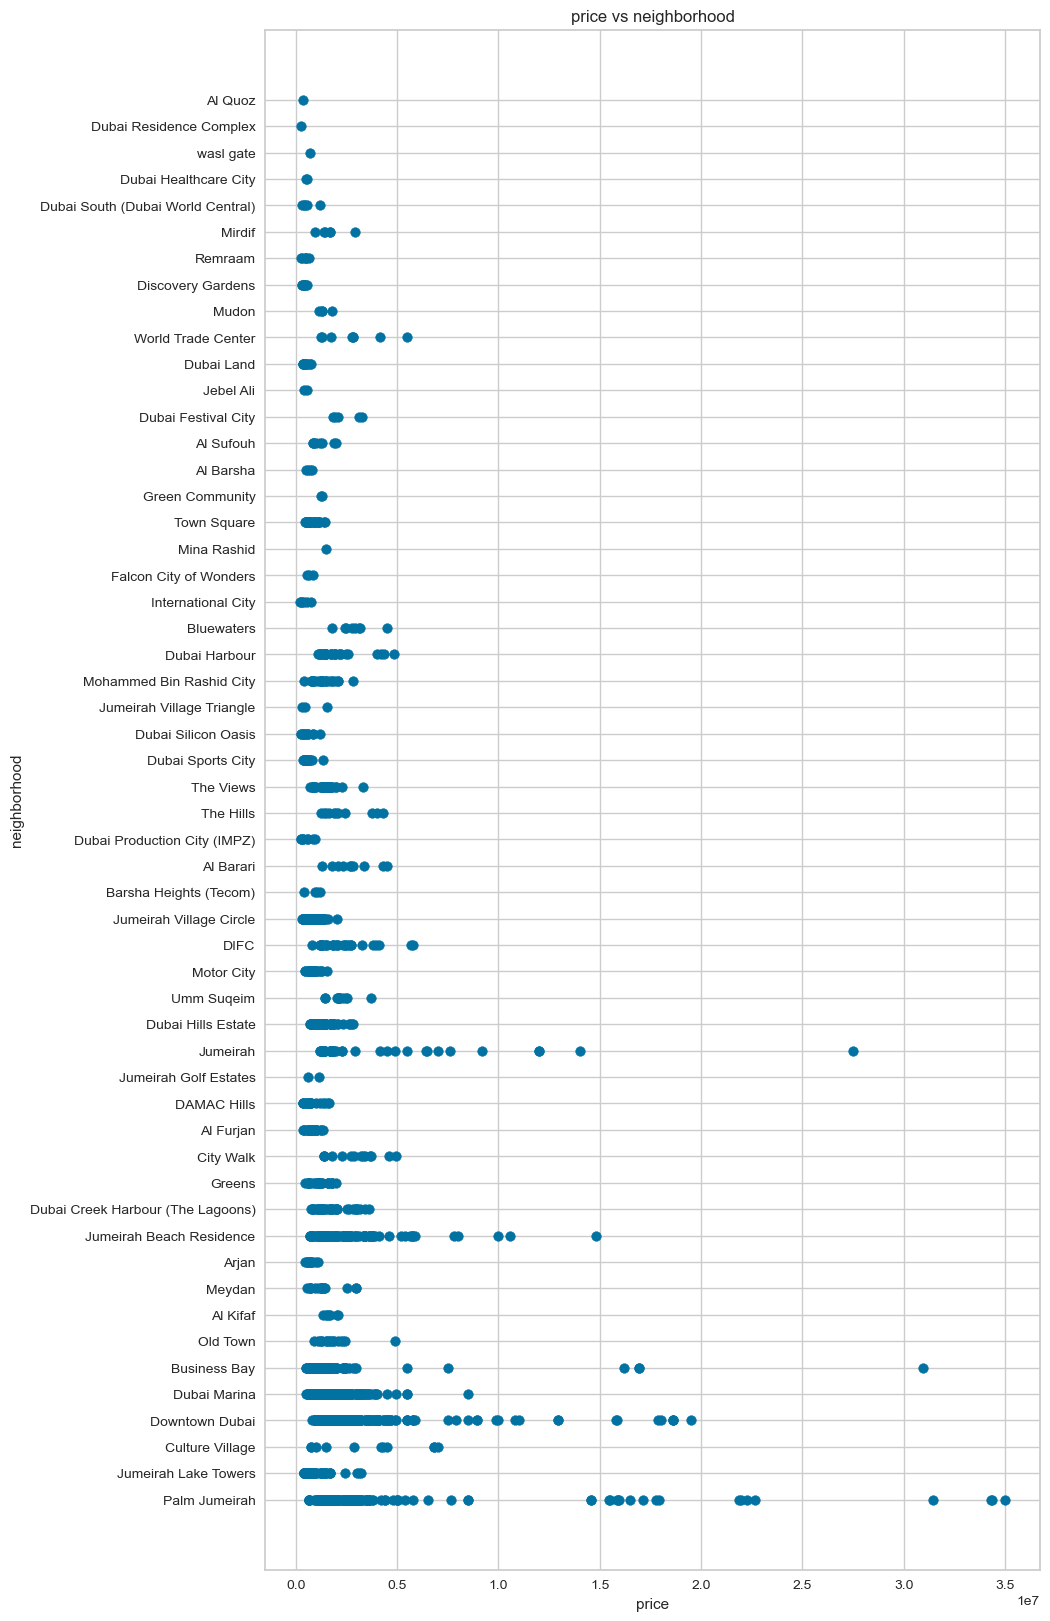

In [24]:
# Scatter plot
plt.figure(figsize=(10, 20))
plt.scatter(data_sebelum['price'], data_sebelum['neighborhood'])
plt.title('price vs neighborhood')
plt.xlabel('price')
plt.ylabel('neighborhood')
plt.grid(True)
plt.show()


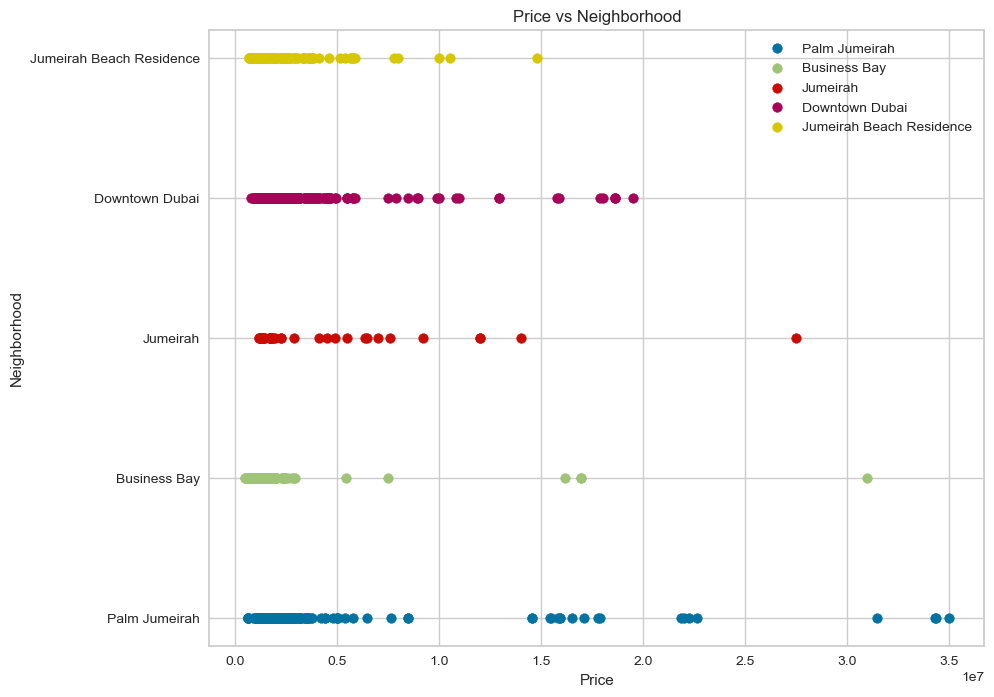

In [29]:
import matplotlib.pyplot as plt

# Assuming data_sebelum is your DataFrame containing apartment data

# Sort the data by price
sorted_data = data_sebelum.sort_values(by='price', ascending=False)

# Select the top 5 neighborhoods by price
top_5_neighborhoods = sorted_data['neighborhood'].unique()[:5]

# Filter the data to include only the top 5 neighborhoods
filtered_data = sorted_data[sorted_data['neighborhood'].isin(top_5_neighborhoods)]

# Create the scatter plot
plt.figure(figsize=(10, 8))
for neighborhood in top_5_neighborhoods:
    neighborhood_data = filtered_data[filtered_data['neighborhood'] == neighborhood]
    plt.scatter(neighborhood_data['price'], neighborhood_data['neighborhood'], label=neighborhood)

plt.title('Price vs Neighborhood')
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.legend()
plt.grid(True)
plt.show()


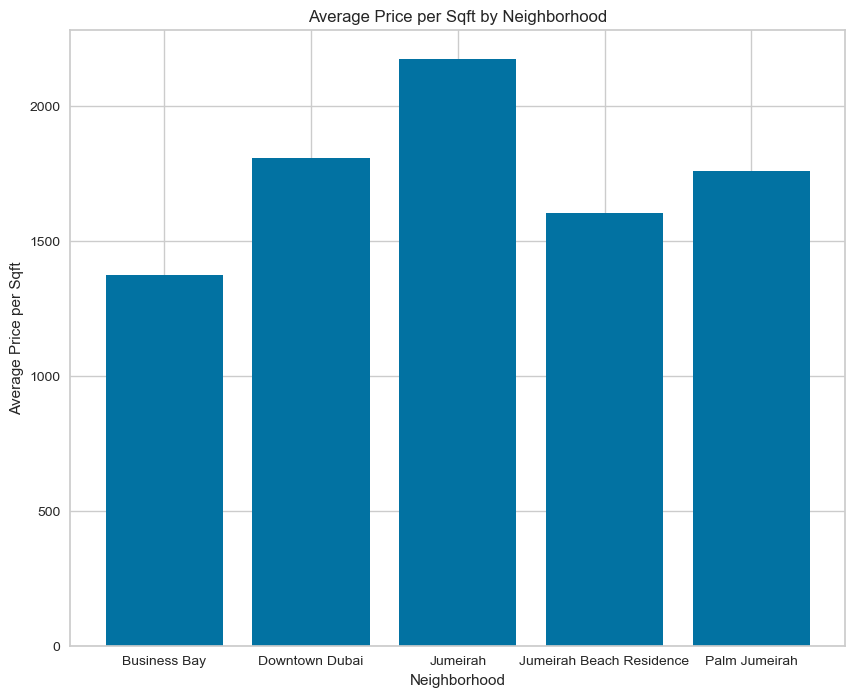

In [33]:
import matplotlib.pyplot as plt

# Assuming data_sebelum is your DataFrame containing apartment data

# Sort the data by price_per_sqft
sorted_data = data_sebelum.sort_values(by='price_per_sqft', ascending=False)

# Select the top 5 neighborhoods by price_per_sqft
top_5_neighborhoods = sorted_data['neighborhood'].unique()[:5]

# Filter the data to include only the top 5 neighborhoods
filtered_data = sorted_data[sorted_data['neighborhood'].isin(top_5_neighborhoods)]

# Calculate the average price per sqft for each neighborhood
avg_price_per_sqft = filtered_data.groupby('neighborhood')['price_per_sqft'].mean()

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.bar(avg_price_per_sqft.index, avg_price_per_sqft.values)
plt.title('Average Price per Sqft by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price per Sqft')
plt.grid(True)
plt.show()


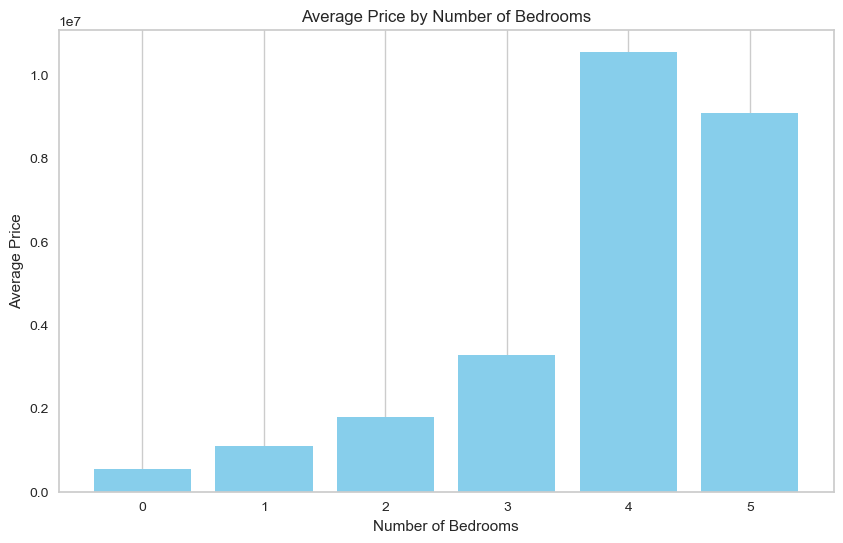

In [36]:
import matplotlib.pyplot as plt

# Assuming data_sebelum is your DataFrame containing apartment data

# Calculate the average price for each number of bedrooms
avg_price_per_bedroom = data_sebelum.groupby('no_of_bedrooms')['price'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_price_per_bedroom.index, avg_price_per_bedroom.values, color='skyblue')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.xticks(avg_price_per_bedroom.index)  # Set x-ticks to be the number of bedrooms
plt.grid(axis='y')
plt.show()


Ada beberapa alasan mengapa harga properti dengan jumlah kamar 4 bisa lebih mahal daripada apartemen dengan jumlah kamar 5:

1. **Ukuran dan Kualitas**: Properti dengan 4 kamar mungkin memiliki ukuran atau kualitas yang lebih baik daripada apartemen dengan 5 kamar. Misalnya, apartemen dengan 4 kamar tidur mungkin memiliki ruang tamu yang lebih besar, fasilitas tambahan seperti ruang keluarga tambahan, atau perabotan yang lebih mewah.

2. **Lokasi**: Lokasi properti juga dapat memengaruhi harga. Properti dengan 4 kamar tidur mungkin terletak di area yang lebih premium atau lebih terkenal dibandingkan dengan apartemen dengan 5 kamar tidur. Lokasi yang lebih baik biasanya memerlukan investasi modal yang lebih tinggi, yang dapat tercermin dalam harga properti.

3. **Permintaan Pasar**: Permintaan pasar dapat memengaruhi harga properti. Jika ada permintaan yang tinggi untuk properti dengan 4 kamar tidur di suatu wilayah tertentu, harga properti tersebut mungkin akan lebih tinggi daripada properti dengan jumlah kamar yang lebih banyak, meskipun jumlah kamar tidurnya lebih sedikit.

4. **Faktor-faktor Eksternal**: Ada juga faktor eksternal lain yang dapat memengaruhi harga properti, seperti kebijakan pemerintah, perkembangan infrastruktur di sekitar properti, atau tren pasar properti lokal.

Secara keseluruhan, harga properti dipengaruhi oleh berbagai faktor, dan penentuan harga yang tepat melibatkan pertimbangan yang kompleks tentang berbagai faktor tersebut.

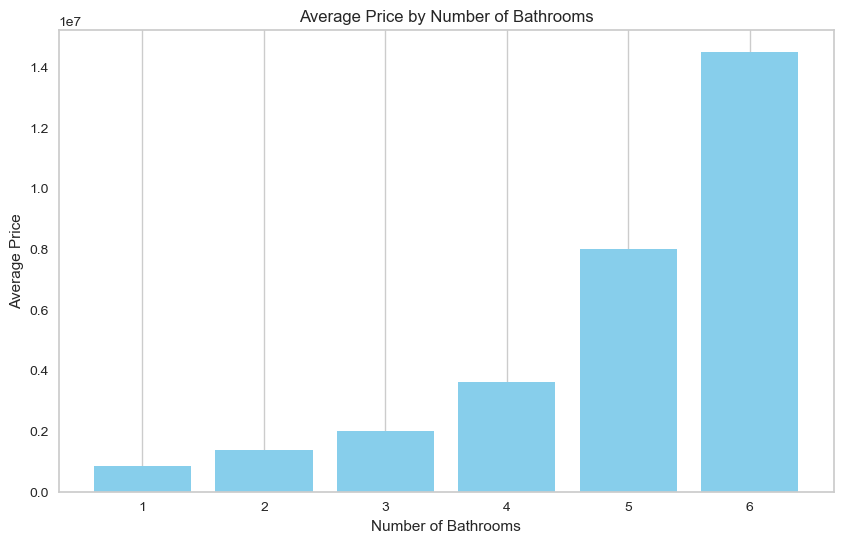

In [39]:
import matplotlib.pyplot as plt

# Assuming data_sebelum is your DataFrame containing apartment data

# Calculate the average price for each number of bedrooms
avg_price_per_bedroom = data_sebelum.groupby('no_of_bathrooms')['price'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_price_per_bedroom.index, avg_price_per_bedroom.values, color='skyblue')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.xticks(avg_price_per_bedroom.index)  # Set x-ticks to be the number of bedrooms
plt.grid(axis='y')
plt.show()


In [16]:
data_sesudah.head(3)

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,concierge,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,shared_pool,cluster
0,Palm Jumeirah,2700000,1079,2502.32,1,2,False,True,True,False,False,False,False,False,2
1,Palm Jumeirah,2850000,1582,1801.52,2,2,False,False,False,False,False,False,False,True,0
2,Jumeirah Lake Towers,1150000,1951,589.44,3,5,True,False,False,False,False,True,False,True,0


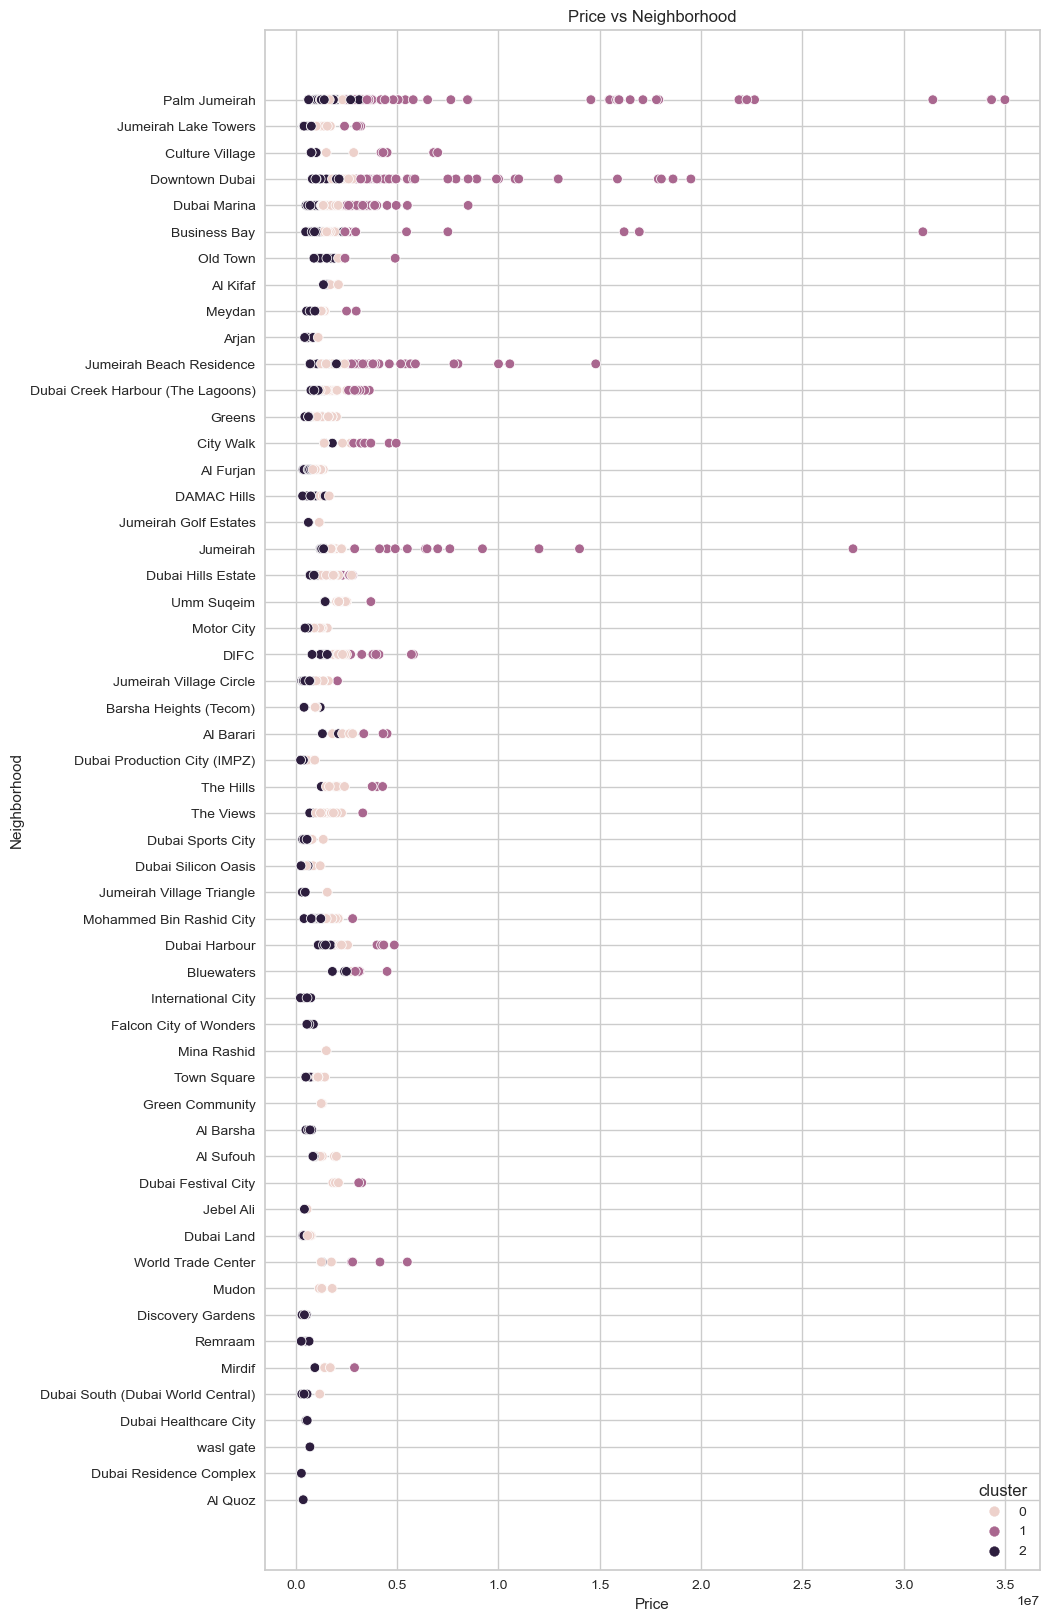

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran gambar
fig, ax = plt.subplots(figsize=(10, 20))

# Menentukan judul dan label sumbu
ax.set_title('Price vs Neighborhood')
ax.set_xlabel('Price')
ax.set_ylabel('Neighborhood')

# Membuat scatter plot
sns.scatterplot(data=data_sesudah, x='price', y='neighborhood', hue='cluster', ax=ax)

plt.show()


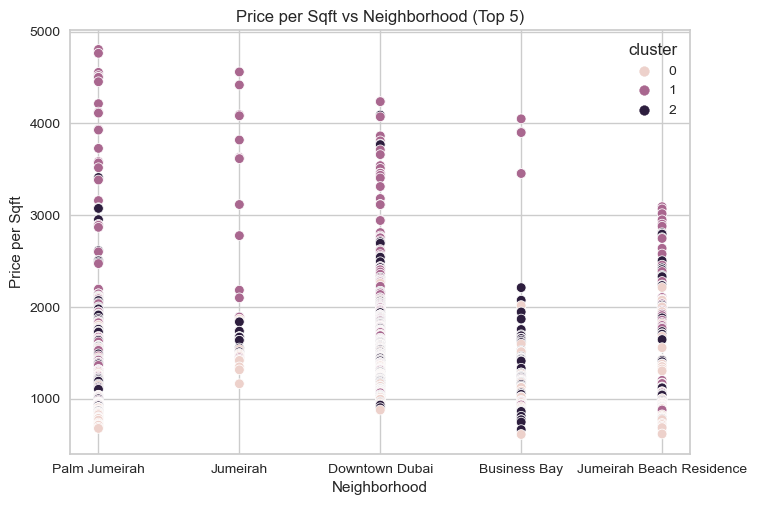

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by price_per_sqft
sorted_data = data_sesudah.sort_values(by='price_per_sqft', ascending=False)

# Select the top 5 neighborhoods by price_per_sqft
top_5_neighborhoods = sorted_data['neighborhood'].unique()[:5]

# Filter the data to include only the top 5 neighborhoods
filtered_data = sorted_data[sorted_data['neighborhood'].isin(top_5_neighborhoods)]

# Create the scatter plot
fig, ax = plt.subplots()
ax.set_title('Price per Sqft vs Neighborhood (Top 5)')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Price per Sqft')
sns.scatterplot(data=filtered_data, x='neighborhood', y='price_per_sqft', hue='cluster', ax=ax)
plt.show()


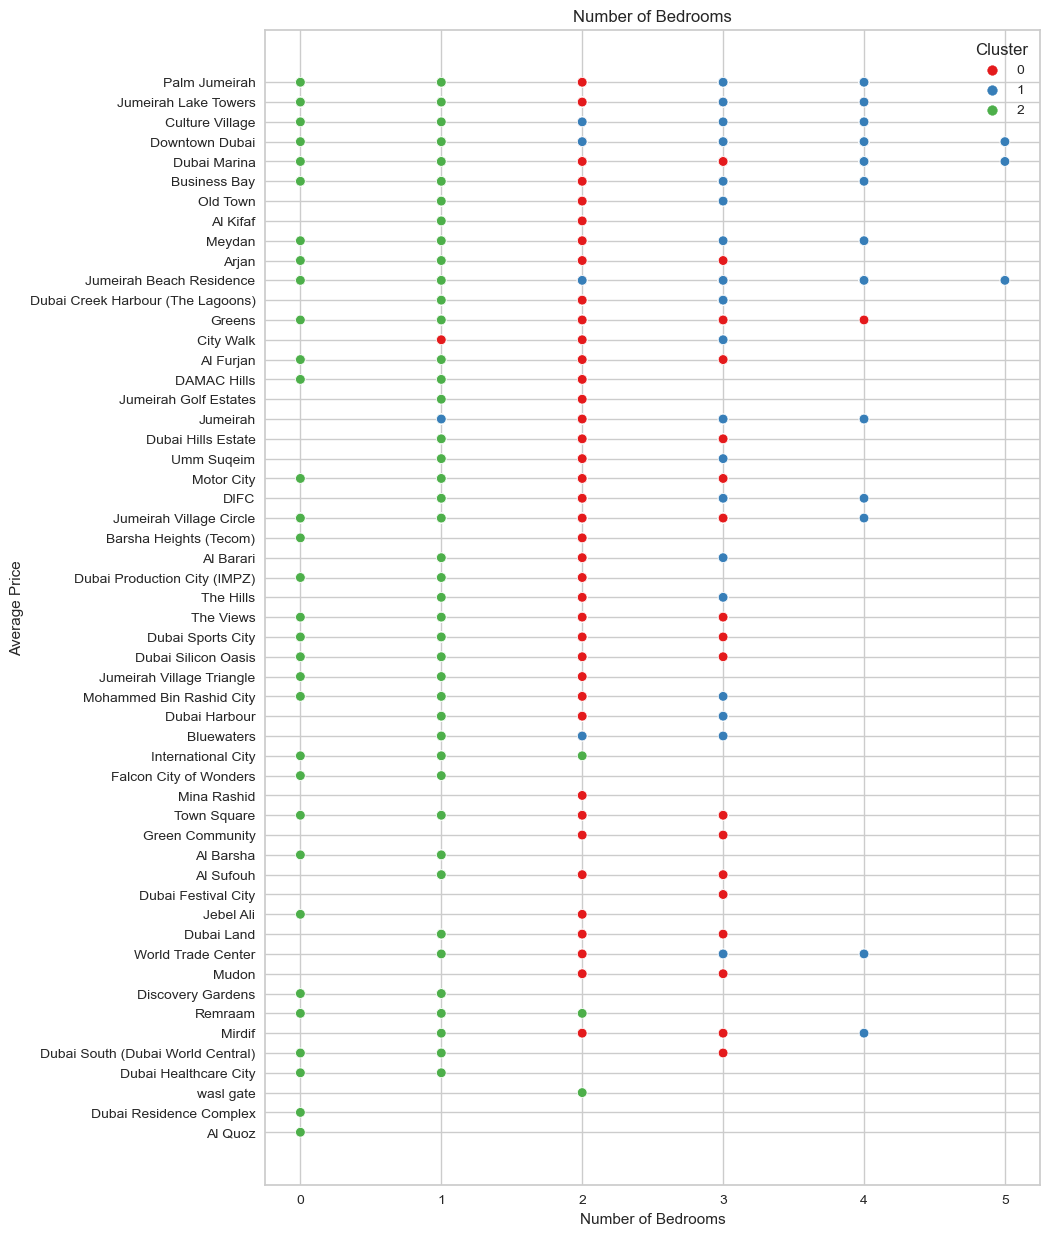

In [81]:
# Create the scatter plot with cluster information
plt.figure(figsize=(10, 15))
sns.scatterplot(data=data_sesudah, x='no_of_bedrooms', y='neighborhood', hue='cluster', palette='Set1')
plt.title('Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


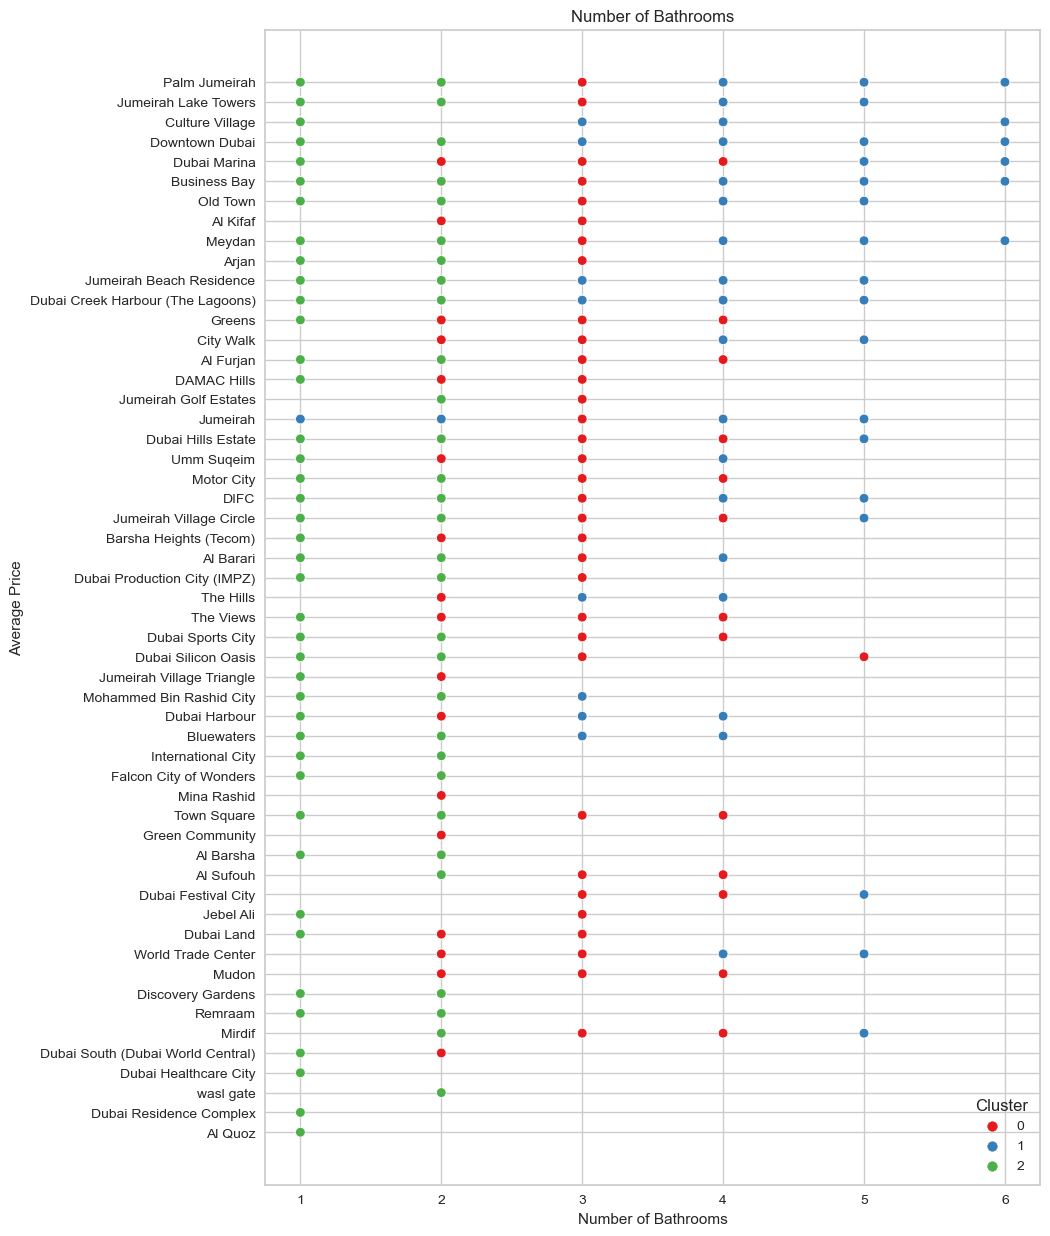

In [82]:
# Create the scatter plot with cluster information
plt.figure(figsize=(10, 15))
sns.scatterplot(data=data_sesudah, x='no_of_bathrooms', y='neighborhood', hue='cluster', palette='Set1')
plt.title('Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()
